# Trabajo 1: Preprocesamiento y evaluación de clasificadores 


**Integrantes del grupo:**

- Monya Tayebi Hillali
- Alicia Jiajun Lorenzo Lourido

### ***Librerías utilizadas***

In [1]:
# base 
import math
import pandas as pd
import numpy as np
# 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mi
#
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
# filtros
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
# wrappers
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
# resample
from sklearn.utils import resample

# evaluation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Modelos 
from sklearn.ensemble import RandomForestClassifier

# Almacenamiento de modelos 
import pickle



In [2]:
SEED_VALUE = 28

### ***Carga de datos***

In [3]:
path_data='./data/datos_accidentes_cerebrovasculares.csv'
datos = pd.read_csv(path_data, sep=',')


##### Análisis descriptivo de los datos

***Información de los datos***

Comenzamos viendo los datos en la tabla ,  el número de filas y columnas de nuestro dataset : 

In [4]:
datos

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Vemos como tenemos los datos de 5110 pacientes y los valores de 11 parámetros de entrada distintos y 1 de salida. 

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


En cuanto a los parámetros del dataset, podemos ver con info() los tipos de datos...

*Consideramos que Unknown es la cuarta categoría*

modificamos los datos str a numericos para poder visualizarlos en sns de tal manera que podamos comprender mejor su comportamiento 

In [6]:
def get_dict_of_relation_value_and_numeric(dataframe,column):
    return {value:number for number,value in enumerate(dataframe[column].unique())}
def transform_data_of_column_to_numeric(dataframe,column):
    dataframe[column] = dataframe[column].map(get_dict_of_relation_value_and_numeric(dataframe,column)) 
def transform_data_to_numeric(dataframe,column_list):
    for column in column_list:
        transform_data_of_column_to_numeric(dataframe, column)

In [7]:
datos_tranform = datos.copy() 
column_list=['gender','ever_married','work_type','Residence_type','smoking_status']
transform_data_to_numeric(datos_tranform,column_list)
#datos1['gender'] = datos1['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
#datos1['ever_married'] = datos1['ever_married'].map({'No': 0, 'Yes': 1})
#datos1['work_type'] = datos1['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
#datos1['Residence_type'] = datos1['Residence_type'].map({'Rural': 0, 'Urban': 1})
#datos1['smoking_status'] = datos1['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [8]:
datos_tranform.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,NaN,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1


In [9]:
sns.pairplot(datos_tranform)

/home/alourido/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Error in callback <function flush_figures at 0x7ff339d822a0> (for post_execute):


KeyboardInterrupt: 

En este primer gráfico podemos ver como muchos de los sub-gráficos no aportan información clara sobre el conjunto de datos pero sí que podemos destacar la representación de las variables *stroke* y *age* donde vemos que a partir de los 40 años es donde los ataques son más frecuentes así como en el gráfico de los pares de variables *stroke* y *bmi* donde los ataques son más frecuentes para índices de masa corporal entre 20 y 60.

In [10]:
def count_unique_values_column(data,column):
    # Verificar si la columna existe en el DataFrame
    if column not in data.columns:
        return "La columna especificada no existe en el DataFrame."
    # Obtener los valores únicos y contar su frecuencia
    unique_values_counts = data[column].value_counts().to_dict()
    return unique_values_counts

def compare_two_columns(data,column_name_1,column_name_2):
    values_uniques_1=data[column_name_1].unique()
    values={}
    for value_unique in values_uniques_1:
        values[value_unique]=count_unique_values_column(data[data[column_name_1]==value_unique],column_name_2)
    return values
def create_dataframe_from_dict(values,column_name_1):
    result_df = pd.DataFrame(values).T.fillna(0).astype(int)
    result_df.index.name = column_name_1
    
    return result_df
def plot_bar_comparative(data,column_name_1,column_name_2='stroke'):
    # Graficar
    data_comparate=compare_two_columns(data,column_name_1,column_name_2)
    print(data_comparate)
    resultado=create_dataframe_from_dict(data_comparate,column_name_1)
    
    resultado.plot(kind='bar')
    plt.title('Comparación de valores de "stroke" por {}'.format(column_name_1))
    plt.xlabel(column_name_1)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.legend(title='Stroke')
    plt.show()

In [11]:
# Definir función personalizada para pairplot con colores diferenciados por 'stroke'
def custom_pairplot(data, hue):
    sns.set(style="ticks")
    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'})

# Definir función personalizada para pairplot con colores diferenciados por 'stroke' y puntos transparentes
def custom_pairplot_1(data, hue):
    sns.set(style="ticks")
    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'}, plot_kws={'alpha': 0.5})

    
def custom_pairplot_2(data, hue):
    def custom_scatter(x, y, hue, **kwargs):
        plt.scatter(x, y, alpha=0.5 if hue.iloc[0] == 0 else 1, **kwargs)

    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'}, plot_kws={'scatter_kws': {'alpha': 0.5}}, diag_kind='hist', diag_kws={'alpha': 0.5})
    # Sobrescribir la función scatter de seaborn para aplicar alpha condicionalmente
    
def custom_pairplot_3(data, hue):
    def custom_scatter(x, y, hue, **kwargs):
        if hue.iloc[0] == 0:
            kwargs['alpha'] = 0.5
        plt.scatter(x, y, **kwargs)

    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'})
    # Sobrescribir la función scatter de seaborn para aplicar alpha condicionalmente
    for ax in plt.gcf().get_axes():
        ax.scatter = custom_scatter
    


##### ***Información de los atributos***

{'Male': {0: 2007, 1: 108}, 'Female': {0: 2853, 1: 141}, 'Other': {0: 1}}


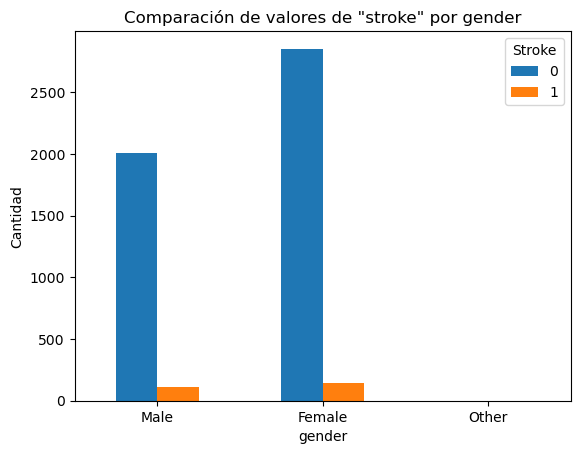

{0: {0: 4429, 1: 183}, 1: {0: 432, 1: 66}}


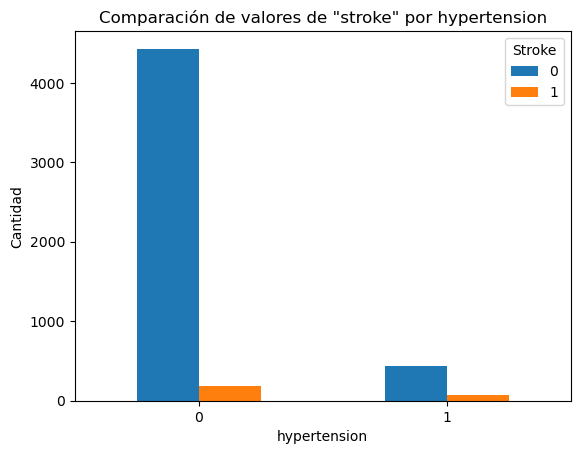

{1: {0: 229, 1: 47}, 0: {0: 4632, 1: 202}}


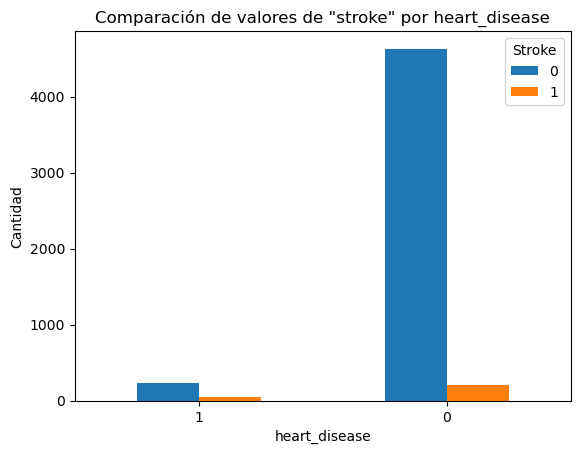

{'Yes': {0: 3133, 1: 220}, 'No': {0: 1728, 1: 29}}


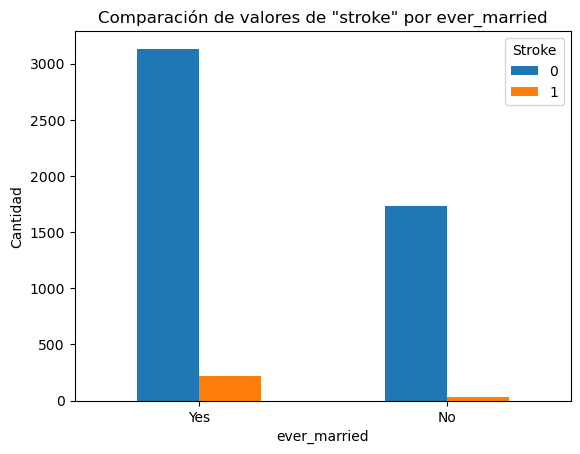

{'Private': {0: 2776, 1: 149}, 'Self-employed': {0: 754, 1: 65}, 'Govt_job': {0: 624, 1: 33}, 'children': {0: 685, 1: 2}, 'Never_worked': {0: 22}}


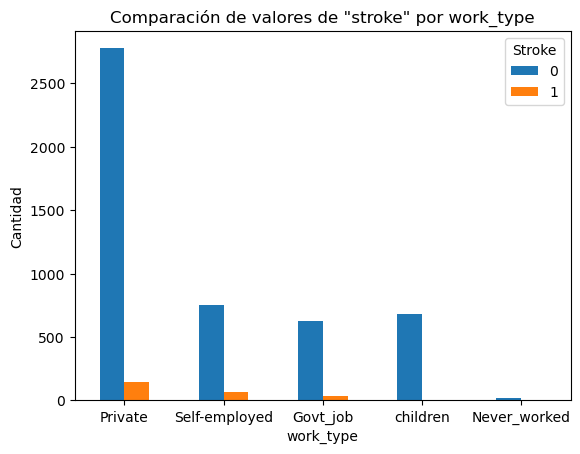

{'Urban': {0: 2461, 1: 135}, 'Rural': {0: 2400, 1: 114}}


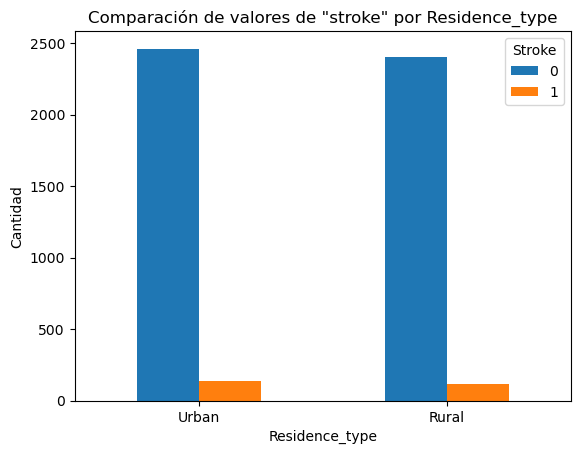

In [ ]:
for column in datos.columns:
    if len(datos[column].unique())<10 and column!='stroke':
        plot_bar_comparative(datos,column)

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
# Filtrar datos donde 'stroke' es igual a 0
df_stroke_0 = datos_tranform[datos_tranform['stroke'] == 0]

# Crear pairplot
g = sns.pairplot(data=datos_tranform, hue='stroke', palette={0: 'blue', 1: 'red'})

# Superponer puntos donde 'stroke' es igual a 1 sobre el pairplot
for i in range(len(g.axes)):
    for j in range(len(g.axes)):
        if i != j:
            g.axes[i, j].scatter(df_stroke_0.iloc[:, j], df_stroke_0.iloc[:, i], c='blue', alpha=0.5, label='Stroke 0')
            g.axes[i, j].scatter(datos_tranform[datos_tranform['stroke'] == 1].iloc[:, j], datos_tranform[datos_tranform['stroke'] == 1].iloc[:, i], c='red', label='Stroke 1')
            #g.axes[i, j].legend()

plt.show()

### ***Preprocesado***

#### ***Gestión de datos ausentes***

In [ ]:
datos.head()

Vemos en la salida anterior que los valores ausentes se indican como NaN.

In [ ]:
datos.info()

Si mostramos la información del dataframe vemos que de las 12 columnas del dataset, solo la columna *bmi* tiene datos faltantes, concretamente 201 elementos faltantes. Otra forma de verlo es usando *isnull().sum()*, como sigue, y vemos como efectivamente solo la columna *bmi* tiene datos faltantes: 

In [ ]:
datos.isnull().sum()

Podemos representarlo en forma matricial, donde cada fila representa uno de los objetos, y los valores ausentes se representan en blanco, y vemos como se distribuyen los valores ausentes en la columna *bmi*:

In [ ]:
mi.matrix(datos)

A continuación, daremos solución a estos datos ausentes. Como hemos visto, son 201 objetos con el dato de *bmi* faltante sobre un total de 5110, es decir, un 4% aproximadamente de los objetos carecen de valor para este atributo. Al tratarse de un porcentaje bajo podríamos optar por eliminar los objetos pero no lo haremos así. Optaremos por su imputación.  

Seguidamente, al tratarse de una variable con datos reales, emplearemos las siguientes estrategias de imputación: media, mediana, valor más frecuente, constante y KNN. 

In [ ]:
# Mean Imputation
df_imp1 = datos.copy()
si1 = SimpleImputer(strategy='mean')
df_imp1['bmi'] = si1.fit_transform(df_imp1['bmi'].values.reshape(-1,1))

# Median Imputation
si2 = SimpleImputer(strategy='median')
df_imp2 = datos.copy()
df_imp2['bmi'] = si2.fit_transform(df_imp2['bmi'].values.reshape(-1,1))

# Most Frequent Imputation
si3 = SimpleImputer(strategy='most_frequent')
df_imp3 = datos.copy()
df_imp3['bmi'] = si3.fit_transform(df_imp3['bmi'].values.reshape(-1,1))

# Constant Imputation: elegimos el valor 30
si4 = SimpleImputer(strategy='constant', fill_value=30)
df_imp4 = datos.copy()
df_imp4['bmi'] = si4.fit_transform(df_imp4['bmi'].values.reshape(-1,1))

# KNN Imputation
knni = KNNImputer(n_neighbors=5, weights="uniform")
df_imp5 = datos.copy()
df_imp5['bmi'] = knni.fit_transform(df_imp5['bmi'].values.reshape(-1,1))


In [ ]:
null_values = datos['bmi'].isnull()

fig = plt.Figure()
fig = df_imp1.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp2.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Median Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp3.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Most Frequent Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp4.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Constant Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp5.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

### `HAY QUE ESCOGER UNA DE LAS IMPUTACIONES PARA PODER CONTINUAR CON LAS TRANSFORMACIONES Y DEMÁS, SINO, TENDRÍAMOS QUE HACER LAS TRANSFORMACIONES Y EL RESTO DE LOS PASOS PARA CADA UNO DE LOS TIPOS DE IMPUTACIÓN LO CUAL NO CREO Q COMPENSE DEMASIADO. DE MOMENTO  UTILIZARÉ LA IMPUTACIÓN POR MEDIANA. `

In [20]:
datos = df_imp2.copy()

#### ***Transformación de datos***

In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


En primer lugar debemos transformar la variable de salida *stroke* para que pase de ser de tipo de dato *int64* a *category* ya que usaremos posteriormente modelos de clasificación. Además, en lugar de utilizar el 0 y el 1 como representaciones de las dos clases existentes, los sustimos por 'No' y 'Yes', respectivamente:

In [22]:
datos['stroke'].mask(datos['stroke'] == 0, 'No', inplace=True)
datos['stroke'].mask(datos['stroke'] == 1, 'Yes', inplace=True)
datos['stroke'] = datos['stroke'].astype('category')

A continuación, convertimos el resto de las columnas a los tipos de datos adecuados:

In [23]:
datos['gender'] = datos['gender'].astype('category')
datos['hypertension'] = datos['hypertension'].astype('boolean')
datos['heart_disease'] = datos['heart_disease'].astype('boolean')
datos['ever_married'] = datos['ever_married'].astype('category')
datos['work_type'] = datos['work_type'].astype('category')
datos['Residence_type'] = datos['Residence_type'].astype('category')
datos['smoking_status'] = datos['smoking_status'].astype('category')

Comprobamos a continuación los nuevos tipos de datos de las columnas: 

In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   boolean 
 4   heart_disease      5110 non-null   boolean 
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: boolean(2), category(6), float64(3), int64(1)
memory usage: 210.6 KB


#### ***Estandarización de datos***

En este apartado, comenzaremos dando solución al desbalanceo de las clases del dataset que hemos visto en secciones anteriores. Seguidamente, dividiremos los datos en entrenamiento y en test para aplicar la estandarización sobre los datos de entrenamiento porque al tratarse de un problema de clasificación, la variable de salida no tiene sentido estandarizarla. Optamos por estandarización y no por normalización ya que nos aportará mayores beneficios en nuestros modelos...

Comenzamos entonces viendo de nuevo el desbalanceo de nuestro dataset: 

stroke
No     4861
Yes     249
Name: count, dtype: int64


<Axes: xlabel='stroke'>

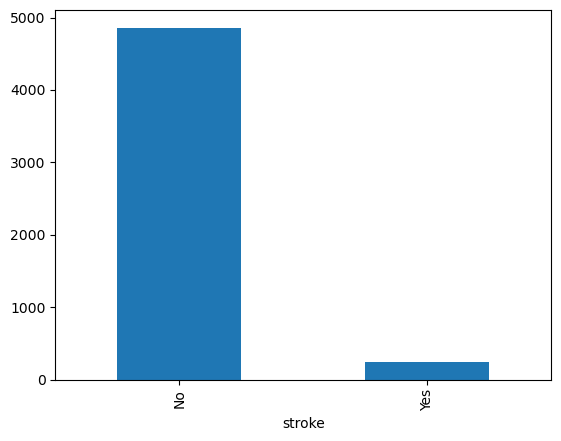

In [25]:
print(datos['stroke'].value_counts())
datos['stroke'].value_counts().plot(kind='bar')

Vemos que aproximadamente el 95% de los datos son de la clase 'No' o 0, es decir, la mayoría de los pacientes no han tenido ningún ataque. Para este caso se optará por el uso de down sampling. 

(249, 12)


<Axes: xlabel='stroke'>

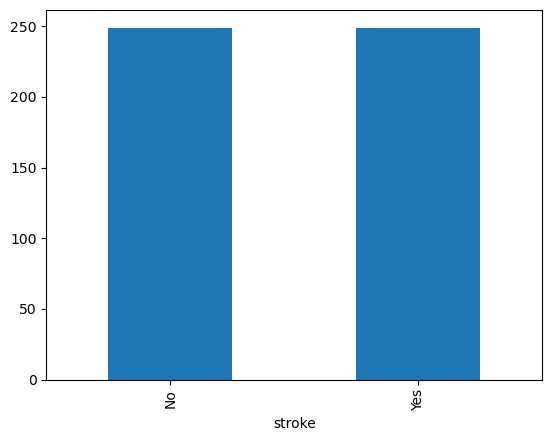

In [26]:
con_ataque = datos[datos['stroke'] == "Yes"]
sin_ataque  = datos[datos['stroke'] == "No"]

sin_ataque_downsample = resample(sin_ataque, replace=True, n_samples=len(con_ataque), random_state=SEED_VALUE)
print(sin_ataque_downsample.shape)

data_downsampled = pd.concat([sin_ataque_downsample, con_ataque])
data_downsampled['stroke'].value_counts().plot(kind='bar')

In [27]:
dataset_train, dataset_test = train_test_split(data_downsampled, test_size=0.2, random_state=SEED_VALUE, stratify=data_downsampled["stroke"])

X_train, y_train = dataset_train.drop('stroke', axis=1), dataset_train['stroke']
X_test, y_test = dataset_test.drop('stroke', axis=1), dataset_test['stroke']

Ahora, pasaremos a estandarizar los datos. Como hemos indicado anteriormente, no estandarizaremos la variable dependiente 'stroke' pero tampoco las variables categóricas ya que no tiene sentido este tipo de variables.  

In [28]:
scaler = StandardScaler().fit(X_train['age'].values.reshape(-1,1))
X_train['age'] = scaler.transform(X_train['age'].values.reshape(-1,1))

scaler = StandardScaler().fit(X_train['avg_glucose_level'].values.reshape(-1,1))
X_train['avg_glucose_level'] = scaler.transform(X_train['avg_glucose_level'].values.reshape(-1,1))

scaler = StandardScaler().fit(X_train['bmi'].values.reshape(-1,1))
X_train['yuu'] = scaler.transform(X_train['bmi'].values.reshape(-1,1))

scaler = StandardScaler().fit(X_test['age'].values.reshape(-1,1))
X_test['age'] = scaler.transform(X_test['age'].values.reshape(-1,1))

scaler = StandardScaler().fit(X_test['avg_glucose_level'].values.reshape(-1,1))
X_test['avg_glucose_level'] = scaler.transform(X_test['avg_glucose_level'].values.reshape(-1,1))

scaler = StandardScaler().fit(X_test['bmi'].values.reshape(-1,1))
X_test['bmi'] = scaler.transform(X_test['bmi'].values.reshape(-1,1))

X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
41,1261,Male,-0.075787,False,False,Yes,Private,Urban,-0.861983,-0.096051,never smoked
24,4219,Male,0.715826,False,False,Yes,Private,Urban,-0.273469,-0.292638,formerly smoked
174,40899,Female,1.041784,False,False,Yes,Self-employed,Rural,-1.058154,-0.156539,formerly smoked
71,2326,Female,0.529564,True,False,Yes,Private,Rural,1.144356,-0.156539,formerly smoked
181,66204,Male,0.157040,False,False,Yes,Private,Urban,-0.121553,0.433219,formerly smoked


#### ***Selección de variables***

*COMENTAR DE FORMA RESUMIDA LO QUE VIMOS EN EL APARTADO DE INFO DE LOS DATOS*

En primer lugar utilizaremos una codificación one-hot que el modelo de selección de características pueda entender. 

In [29]:
datos1 = X_train.copy() 
column_list=['gender','ever_married','work_type','Residence_type','smoking_status']
transform_data_to_numeric(datos1,column_list)

# datos1['gender'] = datos1['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
# datos1['ever_married'] = datos1['ever_married'].map({'No': 0, 'Yes': 1})
# datos1['work_type'] = datos1['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
# datos1['Residence_type'] = datos1['Residence_type'].map({'Rural': 0, 'Urban': 1})
# datos1['smoking_status'] = datos1['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [30]:
X, y = datos1, y_train
print('Tamaño del conjunto de datos: {}'.format(X.shape))

Tamaño del conjunto de datos: (398, 11)


Comenzamos probando la eliminación de variables con varianza baja como sigue:

In [31]:
sel1 = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new1 = sel1.fit_transform(X)
# Obtenemos los nombres de las características seleccionadas
mask1 = sel1.get_support()
selected_features1 = X.columns[mask1]
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new1.shape))
print("Características seleccionadas: ", selected_features1)

Tamaño del conjunto de variables seleccionadas: (398, 9)
Características seleccionadas:  Index(['id', 'gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')


A continuación, probaremos y compararemos 3 métodos basados en filtros. Comenzamos por el método SelectKBest que elimina todas las características excepto aquellas con mayor puntuación:

Tamaño del conjunto de variables seleccionadas: (398, 5)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


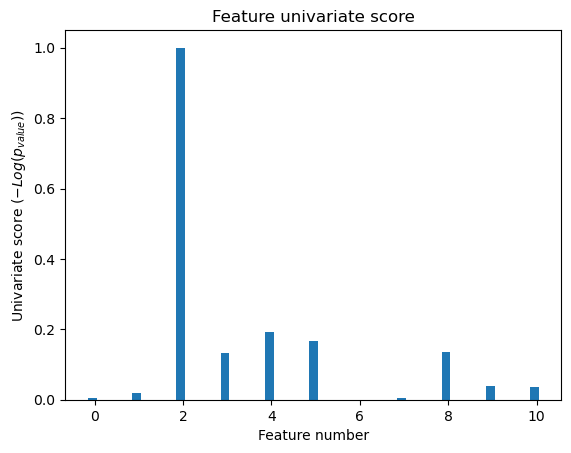

In [32]:
sel2 = SelectKBest(f_classif, k=5)
X_new2 = sel2.fit_transform(X, y)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new2.shape))
mask2 = sel2.get_support()
selected_features2 = X.columns[mask2]
print("Características seleccionadas: ", selected_features2)


scores2 = -np.log10(sel2.pvalues_)
scores2 /= scores2.max()

X_indices2 = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices2 - 0.05, scores2, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Ahora, probamos SelectPercentile que es un método de selección de características que selecciona las características con los percentiles más altos de la puntuación de la prueba:

Tamaño del conjunto de variables seleccionadas: (398, 5)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


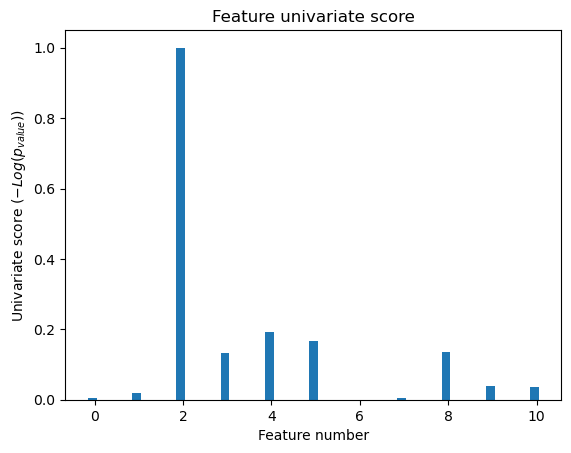

In [33]:
sel3 = SelectPercentile(f_classif, percentile=50)
X_new3 = sel3.fit_transform(X, y)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new3.shape))
mask3 = sel3.get_support()
selected_features3 = X.columns[mask3]
print("Características seleccionadas: ", selected_features3)

scores3 = -np.log10(sel3.pvalues_)
scores3 /= scores3.max()

X_indices3 = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices3 - 0.05, scores3, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Por último, probamos SelectFpr que elimina las características en base a tasa de falsos positivos:

Tamaño del conjunto de variables seleccionadas: (398, 5)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


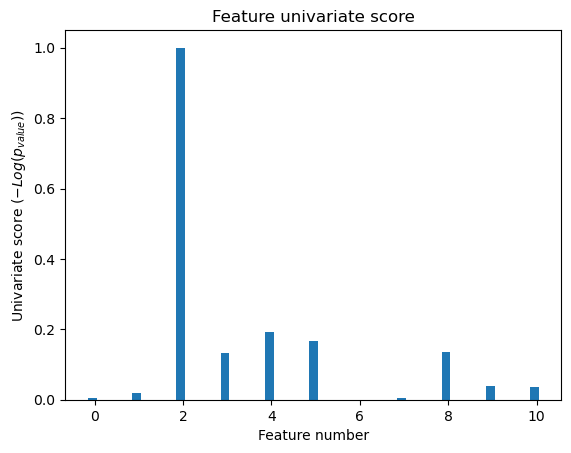

In [34]:
sel4 = SelectFpr(f_classif, alpha=0.05)
X_new4 = sel4.fit_transform(X, y)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new4.shape))
mask4 = sel4.get_support()
selected_features4 = X.columns[mask4]
print("Características seleccionadas: ", selected_features4)

scores4 = -np.log10(sel4.pvalues_)
scores4 /= scores4.max()

X_indices4 = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices4 - 0.05, scores4, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Tamaño del conjunto de variables seleccionadas: (398, 5)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


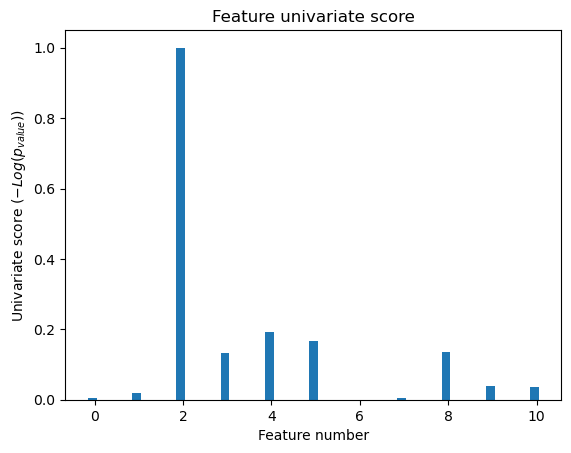

In [35]:
sel5=SelectFwe(f_classif, alpha=0.05)
X_new5 = sel5.fit_transform(X, y)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new5.shape))
mask5 = sel5.get_support()
selected_features5 = X.columns[mask5]
print("Características seleccionadas: ", selected_features4)


scores5 = -np.log10(sel5.pvalues_)
scores5 /= scores5.max()

X_indices5 = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices5 - 0.05, scores5, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Comprobamos si los 4 arrays de características son iguales:

In [36]:
if np.array_equal(selected_features2, selected_features3) and np.array_equal(selected_features3, selected_features4) and np.array_equal(selected_features4, selected_features5):

    print("Los 4 arrays son iguales.")
else:
    print("Los arrays no son iguales.")

Los 4 arrays son iguales.


Vemos que los 4 arrays de características son iguales por lo tanto serán esas las características que consideraremos en el resto de los apartados. Entonces, a continuación, seleccionamos solo las columnas anteriores para continuar con el resto de los apartados:

In [37]:
X_train = X_train[selected_features4]
X_test = X_test[selected_features4]
X_train

,age,hypertension,heart_disease,ever_married,avg_glucose_level
41,-0.075787,False,False,Yes,-0.861983
24,0.715826,False,False,Yes,-0.273469
174,1.041784,False,False,Yes,-1.058154
71,0.529564,True,False,Yes,1.144356
181,0.157040,False,False,Yes,-0.121553
...,...,...,...,...,...
2549,-0.494876,False,False,Yes,-0.199835
3925,0.436433,False,False,Yes,1.258897
30,0.063909,True,False,Yes,1.757228
1731,-1.565882,False,False,No,-1.129371


Selección de características basadas en wrappers

In [38]:
# Create the RFE object and rank each pixel
#svc = SVC(kernel="linear", C=1)
#rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
#X_new6=rfe.fit(X, y)
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
#print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new6.shape))

# Plot pixel ranking
#plt.matshow(ranking, cmap=plt.cm.Blues)
#plt.colorbar()
#plt.title("Ranking of pixels with RFE")
#plt.show()

## MIRAR SI HACER DIVISION EN TRAIN Y TEST PARA HACER SELECCION O NO 

### ***Modelado***

#### ***RandomForest***

Comenzamos entrenando un modelo de clasificación con Random Forest:

In [39]:
X_train.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level
41,-0.075787,False,False,Yes,-0.861983
24,0.715826,False,False,Yes,-0.273469
174,1.041784,False,False,Yes,-1.058154
71,0.529564,True,False,Yes,1.144356
181,0.157040,False,False,Yes,-0.121553


In [40]:
columnas = ['gender', 'heart_disease', 'work_type', 'Residence_type', 'smoking_status']
transform_data_to_numeric(X_train, columnas)
transform_data_to_numeric(X_test, columnas)

KeyError: 'gender'

Comenzamos entrenando el clasificador RandomForest buscando mediante Cross Validation la mejor combinación de los siguientes parámetros: *n_estimators, ....* <p style='color:red'>NO VA A SER VIABLE HACER UNA BÚSQUEDA EN TODOS LOS PARÁMETROS</p>

##### ***Hold-out***

In [ ]:
hyperparameters = {'n_estimators': np.arange(10, 100, 10),
                   'criterion': ['gini', 'entropy', 'log_loss'],
                    # 'max_depth': [1, 10, 100, None],
                    # 'min_samples_split': np.arange(2, 20, 2),
                    # 'min_samples_leaf': np.arange(1, 20, 2),
                    # 'max_features': [None, 'sqrt', 'log2'],
                    # 'bootstrap': [True, False], 
                    }
rf = RandomForestClassifier()
modelCV_rf = GridSearchCV(rf,
                       hyperparameters,
                       cv=10,
                       scoring='accuracy',
                       return_train_score=True)  

np.random.seed(SEED_VALUE)  
modelCV_rf.fit(X_train, y_train)

# Guardamos el modelo para usarlo posteriormente sin necesidad de reentrenar
with open('./models/rf_model.pkl', 'wb') as f:
    pickle.dump(modelCV_rf, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Cargamos el modelo previamente guardado 
# with open('./models/rf_model.pkl', 'rb') as f:
#     modelCV_rf = pickle.load(f)

Ahora, veamos el ranking de los resultados obtenidos:

In [ ]:
cv_results_rf = pd.DataFrame(modelCV_rf.cv_results_)
cv_results_rf = cv_results_rf.loc[:, ['param_n_estimators', 'param_criterion', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cv_results_rf.sort_values(by='rank_test_score', ascending=True)

En el ranking anterior vemos que la mejor combinación de parámetros (la de menor error de validación cruzada) es: 

In [ ]:
# Creamos una gráfica del entrenamiento anterior


Ahora pasaremos a crear el modelo con los mejores hiperparámetros obtenidos y lo entrenamos: 

In [ ]:
# Crear el modelo Random Forest SUSTITUIR CON LOS MEJORES HIPERPARAMS!!
rf = RandomForestClassifier(n_estimators=100) 
rf.fit(X_train, y_train)
# Obtener la predicción
y_pred_rf = rf.predict(X_test)

Ahora obtenemos la matriz de confusión correspondiente:

In [ ]:
conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
print('La matriz de confusión obtenida por el RandomForest: \n{}'.format(conf_matrix_rf))

Y las siguientes medidas de calidad para modelos de clasificación: 

In [ ]:
precision = precision_score(y_test, y_pred_rf, pos_label='Yes')
print('La precisión del modelo es {:.3f}'.format(precision))
recall = recall_score(y_test, y_pred_rf, pos_label='Yes')
print('El recall del modelo es {:.3f}'.format(recall))
f1 = f1_score(y_test, y_pred_rf, pos_label='Yes')
print('El F1-score del modelo es {:.3f}'.format(f1))
accuracy = accuracy_score(y_test, y_pred_rf)
print('La accuracy del modelo es {:.3f}'.format(accuracy))

##### ***Cross-validation***

In [41]:
X = data_downsampled.drop('stroke', axis=1)
y = data_downsampled['stroke']

column_list=['gender','ever_married','work_type','Residence_type','smoking_status']
transform_data_to_numeric(X ,column_list)

In [46]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1530,8096,0.0,49.0,False,False,0,0.0,0,101.02,24.2,0
4338,2456,1.0,60.0,True,False,0,1.0,1,100.20,28.5,0
1790,64523,1.0,54.0,True,False,0,0.0,0,89.93,32.1,1
336,32689,0.0,48.0,False,False,0,0.0,0,84.38,27.1,2
4485,66945,0.0,49.0,False,False,0,0.0,0,85.33,25.5,1


<p style='color:red'>OPCIÓN 1: Hacer GridSearchCV antes y luego CV de nuevo para un pipeline con los tres pasos PERO el problema es que con qué datos hago el grid search???.</p>

In [42]:
clf = make_pipeline(StandardScaler(), SelectKBest(f_classif, k=5), RandomForestClassifier())
scores = cross_val_score(clf, X, y, cv=10)
print(np.mean(scores))

0.7310612244897958


<p style='color:red'>OPCIÓN 2: PASARLE A GridSearchCV un pipeline con los tres pasos.</p>

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Definición de los hiperparámetros a ajustar
hiperparametros = {
    'rf__n_estimators': [100],
    'rf__max_depth': [None, 5],
    'rf__min_samples_split': [2, 5],
    'selector__k': [1, 5]
}

# Creación del pipeline
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['age', 'avg_glucose_level', 'bmi']),  # Columnas numéricas a escalar
        ],
        remainder='passthrough'  # Pasar las columnas no especificadas
    )),
    ('selector', SelectKBest(f_classif)),
    ('rf', RandomForestClassifier())
])


# Búsqueda de la mejor combinación de hiperparámetros con validación cruzada
modelCV_rf = GridSearchCV(pipeline_rf, hiperparametros, cv=10, scoring='accuracy')
modelCV_rf.fit(X, y)

# with open('./models/rf_model.pkl', 'wb') as f:
#     pickle.dump(modelCV_rf, f, protocol=pickle.HIGHEST_PROTOCOL)
    
# Mejores hiperparámetros encontrados
print(modelCV_rf.best_params_)

# Mejor puntuación obtenida
print(modelCV_rf.best_score_)


{'rf__max_depth': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 100, 'selector__k': 5}
0.7770204081632652


In [61]:
cv_results_rf = pd.DataFrame(modelCV_rf.cv_results_)
cv_results_rf = cv_results_rf.loc[:, ['param_rf__n_estimators', 'param_rf__max_depth', 'param_selector__k', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cv_results_rf.sort_values(by='rank_test_score', ascending=True)

,param_rf__n_estimators,param_rf__max_depth,param_selector__k,mean_test_score,std_test_score,rank_test_score
5,100,5,5,0.777020,0.054391,1
7,100,5,5,0.776980,0.061520,2
6,100,5,1,0.765224,0.044933,3
4,100,5,1,0.763224,0.042847,4
3,100,None,5,0.749020,0.056013,5
1,100,None,5,0.745020,0.051319,6
0,100,None,1,0.741224,0.060115,7
2,100,None,1,0.741224,0.053794,7


In [62]:
print(modelCV_rf.best_estimator_['preprocessor'])
print(modelCV_rf.best_estimator_['rf'].get_params())
print(modelCV_rf.best_estimator_['selector'].get_params())

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'avg_glucose_level', 'bmi'])])
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'k': 5, 'score_func': <function f_classif at 0x7f4e3e81a5c0>}


In [63]:
scl = modelCV_rf.best_estimator_['preprocessor']
scl

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'avg_glucose_level', 'bmi'])])

In [ ]:
scaler = scl.fit(X_test['age'].values.reshape(-1,1))
X_test['age'] = scaler.transform(X_test['age'].values.reshape(-1,1))

scaler = scl.fit(X_test['avg_glucose_level'].values.reshape(-1,1))
X_test['avg_glucose_level'] = scaler.transform(X_test['avg_glucose_level'].values.reshape(-1,1))

scaler = scl.fit(X_test['bmi'].values.reshape(-1,1))
X_test['bmi'] = scaler.transform(X_test['bmi'].values.reshape(-1,1))

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
print('La matriz de confusión obtenida por el RandomForest: \n{}'.format(conf_matrix_rf))

In [ ]:
precision = precision_score(y_test, y_pred_rf, pos_label='Yes')
print('La precisión del modelo es {:.3f}'.format(precision))
recall = recall_score(y_test, y_pred_rf, pos_label='Yes')
print('El recall del modelo es {:.3f}'.format(recall))
f1 = f1_score(y_test, y_pred_rf, pos_label='Yes')
print('El F1-score del modelo es {:.3f}'.format(f1))
accuracy = accuracy_score(y_test, y_pred_rf)
print('La accuracy del modelo es {:.3f}'.format(accuracy))

#### ***LogisticRegression***

**Función Hold-out**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=SEED_VALUE)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:

clf = SVC(kernel='linear', C=1).fit(X_train, y_train)   # Nota: fijamos el valor de C=1 para este ejemplo
print(clf.score(X_test, y_test))

In [ ]:

clf = SVC(kernel='linear', C=1, random_state=SEED_VALUE)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

In [ ]:
print("La CV obtuvo una accuracy media de {:.3f} con desviación estándar igual a {:.3f}".format(scores.mean(), scores.std()))

In [ ]:
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print(scores)

In [ ]:
scores = cross_validate(clf, X, y, scoring=scoring)
print(sorted(scores.keys()))
print(scores['test_recall_macro'])

### ***Discusión de resultados***

In [ ]:
# AÑADIR GRAFICO DE BARRA COMPARATIVO DE LOS 4 CLASIFICADORES

### ***Conclusiones***